# **Crimes in Chicago**

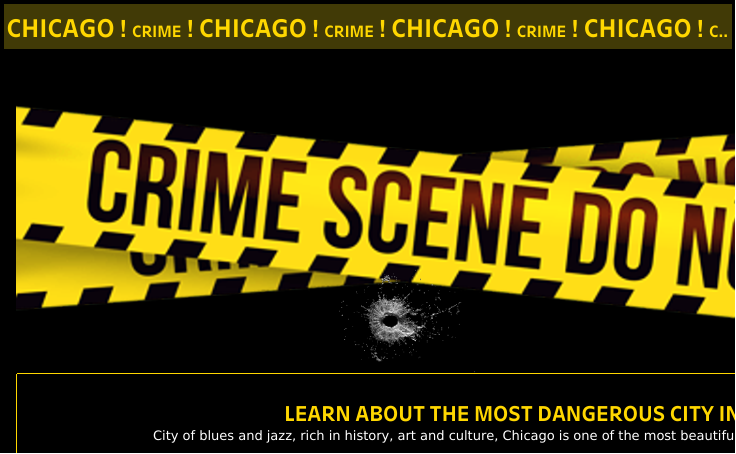

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Should you have questions about this dataset, you may contact the Research & Development Division of the Chicago Police Department at 312.745.6071 or RDAnalysis@chicagopolice.org. Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time. The Chicago Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited. The Chicago Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of Chicago or Chicago Police Department web page. The user specifically acknowledges that the Chicago Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. The unauthorized use of the words "Chicago Police Department," "Chicago Police," or any colorable imitation of these words or the unauthorized use of the Chicago Police Department logo is unlawful. This web page does not, in any way, authorize such use. Data are updated daily. The dataset contains more than 6,000,000 records/rows of data and cannot be viewed in full in Microsoft Excel. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Prophet is the open source software released by facebook's core data science team.
# It's produced for forcasting time series data based on additive model where non-liner trends are fit with yearly, weekly,
# and daily seasonality,plus holiday effects 
# !pip install fbprophet

## **Import Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_1 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
data_2 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
# data_3 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
# data_4 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)

In [ ]:
data_1.shape,data_2.shape

In [ ]:
chicago_data = pd.concat([data_1,data_2])

In [ ]:
chicago_data.shape

In [ ]:
chicago_data.head()

In [ ]:
#Let's check for the null values
plt.figure(figsize=(10,10))
sns.heatmap(chicago_data.isnull(),cbar=False,cmap='YlGnBu')
plt.show()

In [ ]:
chicago_data.columns

In [ ]:
#Drop the columns that we are not going to use from the dataset
chicago_data.drop(['Unnamed: 0','ID','Case Number','IUCR','X Coordinate', 'Y Coordinate','Updated On', 'Latitude',
       'Longitude','Location','FBI Code','Ward','Year','Community Area','District','Beat'],axis=1,inplace=True)

In [ ]:
chicago_data.head()

Check the data type for each column and convert date into datetime

In [ ]:
chicago_data.info()

In [ ]:
chicago_data['Date'] = pd.to_datetime(chicago_data.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [ ]:
chicago_data.info()

In [ ]:
chicago_data.Date.head()

In [ ]:
chicago_data.head()

In [ ]:
chicago_data['Primary Type'].value_counts()

Let's print top 15 crimes

In [ ]:
order_data = chicago_data['Primary Type'].value_counts().iloc[:15].index
order_data

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=chicago_data,order=order_data)
plt.title('Top 15 Crims of Chicago')
plt.show()

In [ ]:
order_for_location = chicago_data['Location Description'].value_counts().iloc[:15].index
order_for_location

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=chicago_data,order=order_for_location)
plt.title('Top 15 Places where happend (Crims of Chicago)')
plt.show()

In [ ]:
chicago_data.set_index('Date',inplace=True)

In [ ]:
chicago_data.head()

Find the crime rate per year

In [ ]:
temp = chicago_data.resample('Y').size()
temp

Let's plot this in graph

In [ ]:
plt.plot(temp)
plt.title('Crime Per year count')
plt.xlabel('Year')
plt.ylabel('Number of crims')
plt.show()

In [ ]:
plt.plot(chicago_data.resample('M').size())
plt.title('Crimes per month count')
plt.xlabel('Year')
plt.ylabel('Number of Crims')
plt.show()

In [ ]:
plt.plot(chicago_data.resample('Q').size())
plt.title('Crimes per Quaterly count')
plt.xlabel('Year')
plt.ylabel('Number of Crims')
plt.show()

In [ ]:
chicago_prohet = chicago_data.resample('M').size().reset_index()
chicago_prohet

In [ ]:
chicago_prohet.columns = ['Date','CrimeCount']
chicago_prohet

In [ ]:
chicago_prohet_data = chicago_prohet.rename(columns={'Date':'ds','CrimeCount':'y'})
chicago_prohet_data

In [ ]:
m = Prophet()
m.fit(chicago_prohet_data)

# **Make a Predicition**

**Let's check crime rate in next one year**

In [ ]:
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)
forcast

In [ ]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

In [ ]:
figure = m.plot_components(forcast)

In [ ]:
future = m.make_future_dataframe(periods=720)
forcast = m.predict(future)
forcast

In [ ]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

In [ ]:
figure = m.plot_components(forcast)